In [52]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import math
import datetime as dt

In [53]:
batman_data = pd.read_csv('Batman_Train.csv')

### Initial Dataset

In [54]:
batman_data

,pickup_datetime,NumberOfPassengers,duration,pickup_x,pickup_y,dropoff_x,dropoff_y
0,2034-01-30 10:24:44,1,724,162.837930,341.187316,160.391473,367.907042
1,2034-03-09 23:10:11,1,127,150.375222,307.042187,152.623686,318.383231
2,2034-05-02 20:23:17,6,386,156.586093,333.063670,169.397955,315.001104
3,2034-06-21 17:51:55,1,1192,161.738726,344.609009,167.702052,310.817653
4,2034-05-15 18:38:15,2,315,174.419521,344.441542,165.780203,344.275954
...,...,...,...,...,...,...,...
999995,2034-04-29 04:09:43,1,1487,172.295246,358.648104,237.915563,150.020402
999996,2034-06-28 16:32:32,1,194,156.652918,319.595856,149.342454,308.040095
999997,2034-03-01 19:47:01,1,353,177.361150,364.699602,176.032965,345.657303
999998,2034-05-16 06:14:23,2,1831,-58.798673,415.754211,51.264798,222.600527


### Checking Shape

In [55]:
batman_data.shape

(1000000, 7)

### Data Types

In [56]:
batman_data.dtypes

pickup_datetime        object
NumberOfPassengers      int64
duration                int64
pickup_x              float64
pickup_y              float64
dropoff_x             float64
dropoff_y             float64
dtype: object

### Checking for Nulls

In [57]:
batman_data.isna().sum(axis=0).sort_values(ascending=False).head(20)

dropoff_y             0
dropoff_x             0
pickup_y              0
pickup_x              0
duration              0
NumberOfPassengers    0
pickup_datetime       0
dtype: int64

### Describing the Data

In [58]:
batman_data.describe()

,NumberOfPassengers,duration,pickup_x,pickup_y,dropoff_x,dropoff_y
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.663923,696.646542,146.981458,341.064506,146.942925,341.088842
std,1.313614,544.929446,35.193678,32.131129,31.948359,36.806725
min,0.000000,0.000000,-581.446604,-654.647124,-582.052597,-571.895120
25%,1.000000,330.000000,145.376326,319.182869,143.741734,318.663868
50%,1.000000,551.000000,152.665592,338.066219,151.985635,338.173298
75%,2.000000,894.000000,160.456675,358.529155,160.301585,361.167400
max,9.000000,5944.000000,816.387363,1196.997803,812.611035,1196.374368


### Checking Distribution of Data

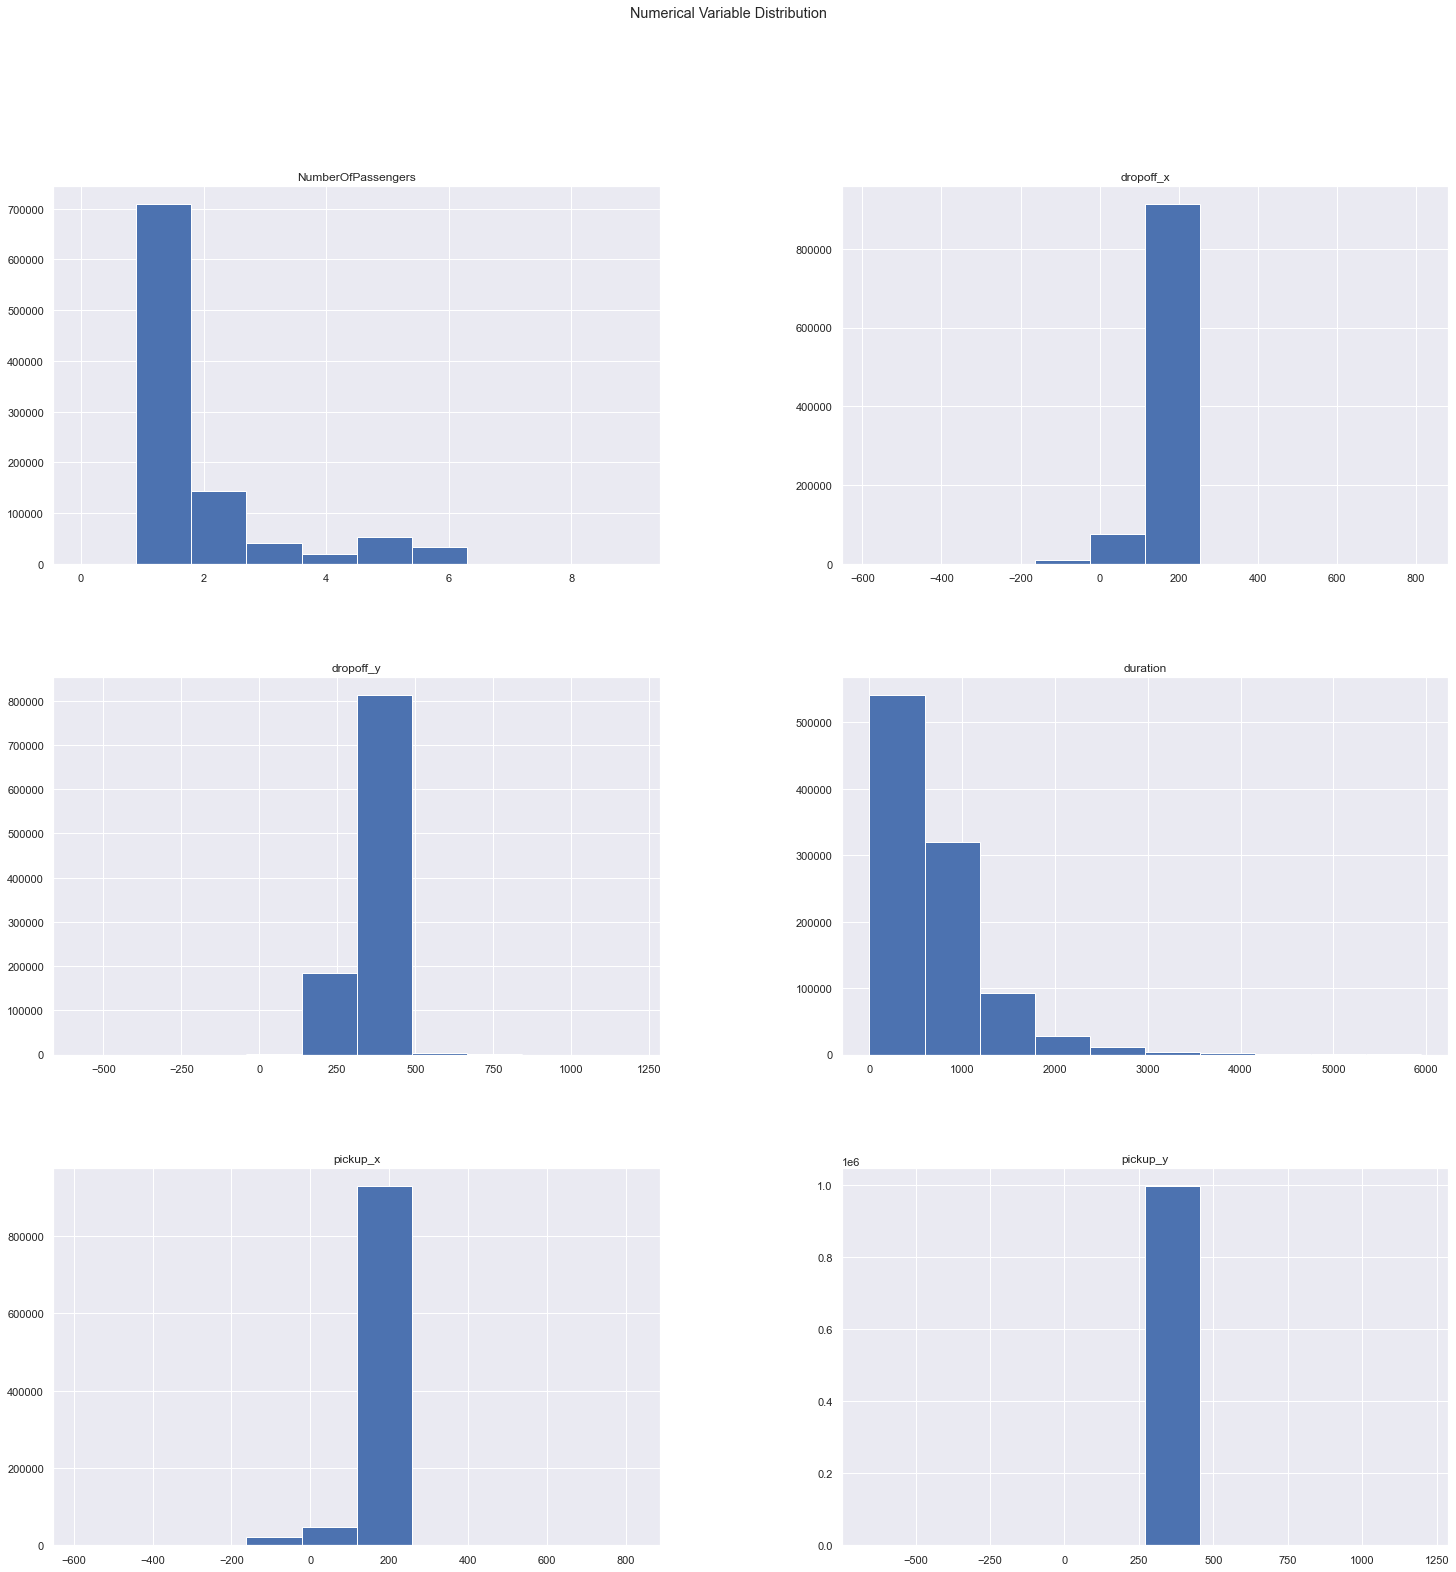

In [59]:
batman_data[batman_data._get_numeric_data().columns].hist(figsize=[25,25])
plt.suptitle("Numerical Variable Distribution")
plt.show()

### Correlations

In [60]:
corr = batman_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,NumberOfPassengers,duration,pickup_x,pickup_y,dropoff_x,dropoff_y
NumberOfPassengers,1.000000,0.014872,-0.004444,0.000679,-0.000559,-0.001947
duration,0.014872,1.000000,-0.394673,0.186713,-0.303248,0.061433
pickup_x,-0.004444,-0.394673,1.000000,-0.316391,0.305295,0.004337
pickup_y,0.000679,0.186713,-0.316391,1.000000,0.009238,0.382842
dropoff_x,-0.000559,-0.303248,0.305295,0.009238,1.000000,-0.095084
dropoff_y,-0.001947,0.061433,0.004337,0.382842,-0.095084,1.000000


### Converting to DateTime

In [61]:
batman_data['pickup_datetime'] = pd.to_datetime(batman_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')


In [62]:
batman_data['pickup_month'] = batman_data['pickup_datetime'].dt.month
batman_data['pickup_day'] = batman_data['pickup_datetime'].dt.day
batman_data['pickup_hour'] = batman_data['pickup_datetime'].dt.hour
batman_data['pickup_minute'] = batman_data['pickup_datetime'].dt.minute
batman_data['pickup_dayofweek'] = batman_data['pickup_datetime'].dt.dayofweek

In [63]:
batman_data = batman_data.drop(columns=['pickup_datetime'])

### DateTime EDA

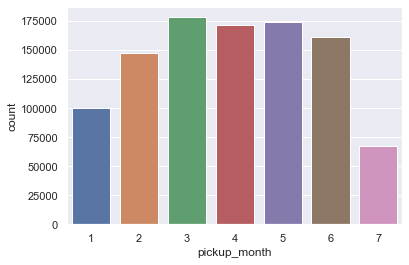

In [64]:
sns.countplot(x=batman_data['pickup_month'])

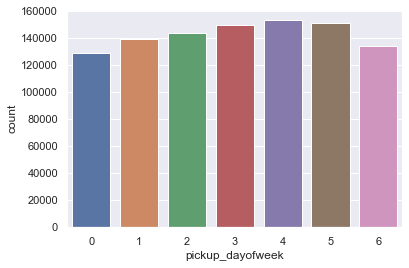

In [65]:
sns.countplot(x=batman_data['pickup_dayofweek'])

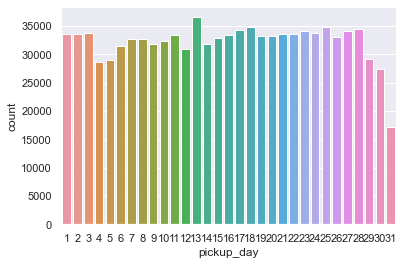

In [66]:
sns.countplot(x=batman_data['pickup_day'])

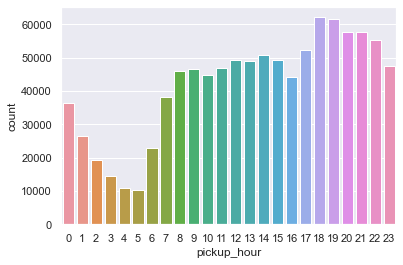

In [67]:
sns.countplot(x=batman_data['pickup_hour'])

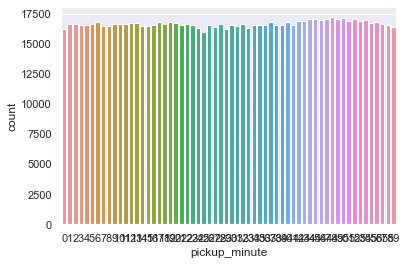

In [68]:
sns.countplot(x=batman_data['pickup_minute'])

### Updated Correlation

In [69]:
corr = batman_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,NumberOfPassengers,duration,pickup_x,pickup_y,dropoff_x,dropoff_y,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_dayofweek
NumberOfPassengers,1.000000,0.014872,-0.004444,0.000679,-0.000559,-0.001947,-0.002897,-0.001631,0.009182,0.000555,0.025250
duration,0.014872,1.000000,-0.394673,0.186713,-0.303248,0.061433,0.060065,-0.002379,0.029620,-0.010321,-0.034065
pickup_x,-0.004444,-0.394673,1.000000,-0.316391,0.305295,0.004337,-0.007372,0.000885,-0.005988,0.003224,-0.000176
pickup_y,0.000679,0.186713,-0.316391,1.000000,0.009238,0.382842,0.003245,0.001809,0.024949,-0.004174,-0.046165
dropoff_x,-0.000559,-0.303248,0.305295,0.009238,1.000000,-0.095084,-0.008402,0.002382,0.044038,0.005608,-0.017102
dropoff_y,-0.001947,0.061433,0.004337,0.382842,-0.095084,1.000000,0.004949,-0.001549,-0.021684,-0.003894,-0.015651
pickup_month,-0.002897,0.060065,-0.007372,0.003245,-0.008402,0.004949,1.000000,-0.235366,-0.003617,-0.000782,-0.010993
pickup_day,-0.001631,-0.002379,0.000885,0.001809,0.002382,-0.001549,-0.235366,1.000000,0.001600,-0.000801,-0.005498
pickup_hour,0.009182,0.029620,-0.005988,0.024949,0.044038,-0.021684,-0.003617,0.001600,1.000000,-0.003718,-0.084700
pickup_minute,0.000555,-0.010321,0.003224,-0.004174,0.005608,-0.003894,-0.000782,-0.000801,-0.003718,1.000000,0.000567


### Feature Engineering

#### DateTime features

In [70]:
batman_data['isWeekend'] = batman_data.apply(lambda x: 1 if ((x['pickup_dayofweek']==5) or (x['pickup_dayofweek']==6)) else 0, axis=1)

In [71]:
rushhour_list = [6,7,8,9,10,15,16,17,18,19]
batman_data['isRushhour'] = batman_data.apply(lambda x: 1 if x['pickup_hour'] in rushhour_list else 0,axis=1)

#### Calculate Distance between pick up and drop off

In [72]:
batman_data['pickup_dropoff_distance'] = (batman_data['pickup_x'] - batman_data['dropoff_x'])**2 + (batman_data['pickup_y'] - batman_data['dropoff_y'])**2
batman_data['pickup_dropoff_distance'] = batman_data.apply(lambda x: math.sqrt(x['pickup_dropoff_distance']),axis=1)

In [73]:
batman_data = batman_data.drop(columns=['pickup_x','pickup_y','dropoff_x','dropoff_y'])

In [74]:
batman_data.to_csv('cleaned_batman_data.csv',index=False)